In [130]:
import pandas as pd
import numpy as np

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

In [132]:
%matplotlib inline

<AxesSubplot:>

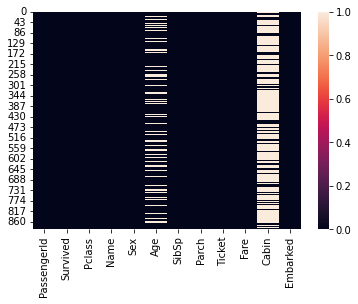

In [133]:
data_train = pd.read_csv("titanic_train.csv")
sns.heatmap(data_train.isnull())

<AxesSubplot:>

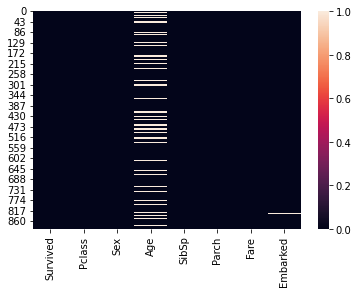

In [134]:
data_train.drop(["Ticket","Cabin","Name","PassengerId"],axis=1,inplace=True)
sns.heatmap(data_train.isnull())

In [135]:
def changeAge(x):
    age = x[0]
    pclass = x[1]
    if pd.isnull(age):
        if pclass == 1:
            return 37
        if pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

<AxesSubplot:>

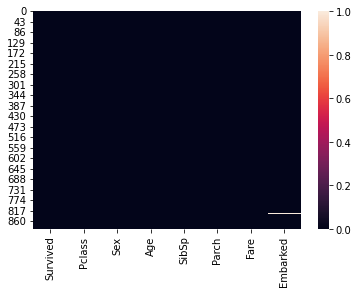

In [136]:
data_train["Age"] = data_train[["Age","Pclass"]].apply(changeAge,axis=1)
sns.heatmap(data_train.isnull())

In [137]:
data_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [138]:
data_train["Embarked"] = data_train["Embarked"].apply(lambda x : data_train["Embarked"].value_counts().max() if x not in ["S","C","Q"] else x)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


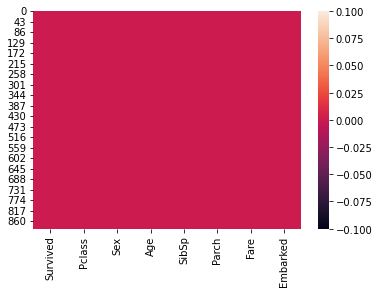

In [139]:
sns.heatmap(data_train.isnull())
print(data_train.isnull().sum())

In [140]:
dum1 = pd.get_dummies(data_train["Sex"]).drop("male",axis=1)

In [141]:
dum2 = pd.get_dummies(data_train["Embarked"]).drop([644,"C"],axis=1)

In [142]:
data_train = pd.concat([data_train,dum1,dum2],axis=1)

In [144]:
data_train = data_train.drop(["Sex","Embarked"],axis=1)

In [145]:
data_train

,Survived,Pclass,Age,SibSp,Parch,Fare,female,Q,S
0,0,3,22.0,1,0,7.2500,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,1
3,1,1,35.0,1,0,53.1000,1,0,1
4,0,3,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,1
888,0,3,24.0,1,2,23.4500,1,0,1
889,1,1,26.0,0,0,30.0000,0,0,0


In [146]:
X = data_train.drop("Survived",axis=1)
y = data_train["Survived"]

In [162]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression

In [163]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [164]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

c:\users\tolga\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [185]:
pred = logmodel.predict(X_test)

In [186]:
from sklearn.metrics import classification_report

In [187]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [188]:
cv = {"penalty":['l1', 'l2', 'elasticnet'],"C":[0.01,0.1,0.25,0.5,0.75,1,1.25,1.5,1.75,2],"max_iter":[100,150,200,250]}
grid = GridSearchCV(logmodel,cv)

In [189]:
grid.fit(X_train,y_train)

c:\users\tolga\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\tolga\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

c:\users\tolga\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\tolga\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

c:\users\tolga\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\tolga\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

c:\users\tolga\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\tolga\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

c:\users\tolga\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\tolga\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75,
                               2],
                         'max_iter': [100, 150, 200, 250],
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [190]:
grid.best_params_

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2'}

In [191]:
new_pred = grid.predict(X_test)

In [192]:
print(classification_report(y_test,new_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

